<h1>Lens ray demos</h1>

In [1]:
#
# jupyter notebook examples to allow simple explortation of gravitational lensing
# of extended objects (i.e., galaxies) by the gravity of several  a singular
# isothermal ellipsoid (SIE) potential.
#
#
# Requires numpy and matplotlib, as well as the suporting file "lensdemo_funcs.py"
# This Notebook is based in:
#
# lensdemo_script.py
# Copyright 2009 by Adam S. Bolton
# Creative Commons Attribution-Noncommercial-ShareAlike 3.0 license applies:
# http://creativecommons.org/licenses/by-nc-sa/3.0/
# All redistributions, modified or otherwise, must include this
# original copyright notice, licensing statement, and disclaimer.
# DISCLAIMER: ABSOLUTELY NO WARRANTY EXPRESS OR IMPLIED.
# AUTHOR ASSUMES NO LIABILITY IN CONNECTION WITH THIS COMPUTER CODE.
#
# Modified by Antonio Herrera Martin, 2018

# Import the necessary packages
import numpy as n
import matplotlib as m
from matplotlib import pyplot as p
from matplotlib import cm
import Lenscat as ldf
#%matplotlib inline

In [2]:
# Package some image display preferences in a dictionary object, for use below:
myargs = {'interpolation': 'nearest', 'origin': 'lower', 'cmap': cm.spectral}

In [3]:
# Make some x and y coordinate images:
nx = 501
ny = 501
xhilo = [-2.5, 2.5]
yhilo = [-2.5, 2.5]
x = (xhilo[1] - xhilo[0]) * n.outer(n.ones(ny), n.arange(nx)) / float(nx-1) + xhilo[0]
y = (yhilo[1] - yhilo[0]) * n.outer(n.arange(ny), n.ones(nx)) / float(ny-1) + yhilo[0]

<h2> Source </h2>

In [4]:
# Set some Gaussian blob image parameters and pack them into an array:
g_amp = 3.0   # peak brightness value
g_sig = 0.05  # Gaussian "sigma" (i.e., size)
g_xcen = 0.0  # x position of center
g_ycen = 0.0  # y position of center
g_axrat = 1 # minor-to-major axis ratio
g_pa = 0.0    # major-axis position angle (degrees) c.c.w. from x axis
gpar = n.asarray([g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa]) 

In [5]:
# Have a look at the un-lensed Gaussian image:
g_image = ldf.gauss_2d(x, y, gpar)
f = p.imshow(g_image, **myargs)

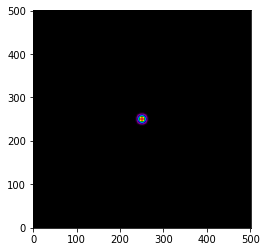

In [6]:
p.show()

<h2>Example Singular Ellipsoid</h2>

In [7]:
# Set some SIE lens-model parameters and pack them into an array:
l_amp = 1.5   # Einstein radius
l_xcen = 0.  # x position of center
l_ycen = 0. # y position of center
l_axrat = 1.0 # minor-to-major axis ratio
l_pa = 0.0    # major-axis position angle (degrees) c.c.w. from x axis
lpar = n.asarray([l_amp, l_xcen, l_ycen, l_axrat, l_pa])

In [8]:
# Compute the lensing potential gradients:
(xg, yg) = ldf.sie_grad(x, y, lpar)

In [9]:
# Evaluate lensed Gaussian image:
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)

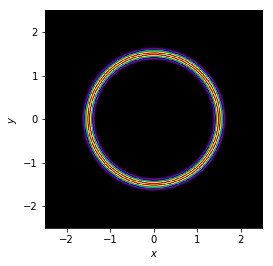

In [10]:
# Have a look:
f = p.imshow(g_lensimage,extent=(-2.5,2.5,-2.5,2.5), **myargs)
p.xlim(-2.5, 2.5)
p.ylim(-2.5,2.5)
p.ylabel(r'$y$')
p.xlabel(r'$x$')
p.show()

<h2>Example Point Mass </h2>

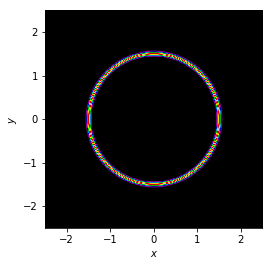

In [11]:
# Same source 
gpar = n.asarray([3.0, 0.05, 0.0, 0.0, 1.0, 0.0])
# Compute the lensing potential gradients:
l_Ein = 1.5  # Einstein radius
l_xcen = 0.0  # x position of center
l_ycen = 0.0 # y position of center
lpar = n.asarray([l_Ein, l_xcen, l_ycen])

#Assign to the point mass.
(xg, yg) = ldf.pm_grad(x, y, lpar)

# Evaluate lensed Gaussian image:
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
# Have a look:
f = p.imshow(g_lensimage,extent=(-2.5,2.5,-2.5,2.5), cmap = cm.spectral)
p.xlim(-2.5, 2.5)
p.ylim(-2.5,2.5)
p.ylabel(r'$y$')
p.xlabel(r'$x$')
p.show()

<h2>Soliton-only</h2>

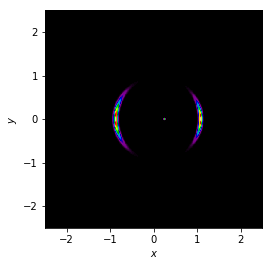

In [12]:
# Same source 
gpar = n.asarray([3.0, 0.05, 0.0, 0.0, 1.0, 0.0])
# Compute the lensing potential gradients:
l_Ein = 1.0  # lens strength, or parameter 'Einstein radius' (Only used if no lambda is provided)
l_lambda = 3.0 # Parameter lambda. ( If it is not provided or set to 0.0, it will be obtained from Einstein radius and printed.)
l_xcen = 0.2  # x position of center
l_ycen = 0.0 # y position of center
lpar = n.asarray([l_Ein,l_lambda, l_xcen, l_ycen])
#lpar = n.asarray([1.0, 0.2, 0.0, 100.0, 3])
(xg, yg) = ldf.sol_grad(x, y, lpar)
# Evaluate lensed Gaussian image:
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
# Have a look:
f = p.imshow(g_lensimage,extent=(-2.5,2.5,-2.5,2.5), **myargs)
p.xlim(-2.5, 2.5)
p.ylim(-2.5,2.5)
p.ylabel(r'$y$')
p.xlabel(r'$x$')
p.show()

<h2> Full Wave-DM</h2>

Lambda for Einstein radius =  3.00878648318


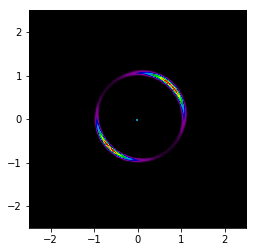

In [13]:
# Same source 
gpar = n.asarray([3.0, 0.05, 0.1, 0.1, 1.0, 0.0])
# Compute the lensing potential gradients:
l_Ein = 1.0  # lens strength, or parameter 'Einstein radius' (Only used if no lambda is provided)
l_lambda = 0. # Parameter lambda. ( If it is not provided or set to 0.0, it will be obtained from Einstein radius and printed.)
l_repsilon = 1. # Transition radius. It must be different from zero
l_alpha = 1. # Alpha. Cannot be Zero nor Negative
l_xcen = 0.0  # x position of center
l_ycen = 0.0 # y position of center

lpar = n.asarray([l_Ein, l_lambda, l_repsilon, l_alpha, l_xcen, l_ycen])

# Compute the lensing potential gradients:
#gpar = n.asarray([3.0, 0.05, 0.1, 0.1, 1.0, 0.0])
#lpar = n.asarray([1.0, 0.0, 0.0, 90.0, 1.0])
(xg, yg) = ldf.wave_grad(x, y, lpar)
# Evaluate lensed Gaussian image:
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
# Have a look:
f = p.imshow(g_lensimage,extent=(-2.5,2.5,-2.5,2.5), **myargs)
p.show()